# Tensorflow visualiazation tools tutorial

## DeepDream

This whole part is based on notebook from from tensorflow avalaible on https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

We will be using tensornets to create our model and matplotlib to load our image.

In [1]:
import tensorflow as tf
import tensornets as nets
import matplotlib
import conveiro.deep_dream as deep_dream
import conveiro.utils as utils
from IPython.display import Image

We need to setup input tensors for our model. 

In [2]:
input_pl, input_t = deep_dream.setup()

We create our model with input_t. Model variable in this case represents logits layer of our model but we don't need it in this case. Even if we wanted to visualize individual classes it is better to use layer before logits, otherwise we will get very distorted output, because it is often easier to just minimize other classes instead of optimizing one.

We can use any other network as long as we can feed our input tensor into it.

In [3]:
model = nets.Inception1(input_t)
graph = tf.get_default_graph()
sess = tf.Session()

We load pretrained weights for our model.

In [4]:
sess.run(model.pretrained());

It is neccessary to choose our objective. With it we can select what neuron/layer to visualize. 

In [5]:
objective = graph.get_tensor_by_name("inception1/block4c/concat:0")

### Multiscale

In [6]:
image = deep_dream.render_image_multiscale(objective[..., 10], sess, input_pl)

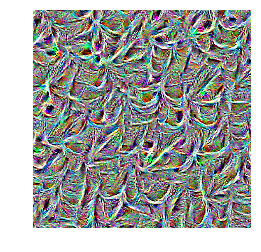

In [7]:
utils.show_image(utils.normalize_image(image))

### Laplacian Pyramid

In [8]:
image = deep_dream.render_image_lapnorm(objective[..., 10], sess, input_pl)

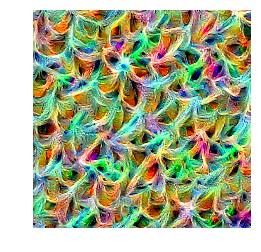

In [9]:
utils.show_image(utils.normalize_image(image))

### DeepDream

We can load our image using matplotlib so we can use this image as seed image. This image will be used instead of random image.

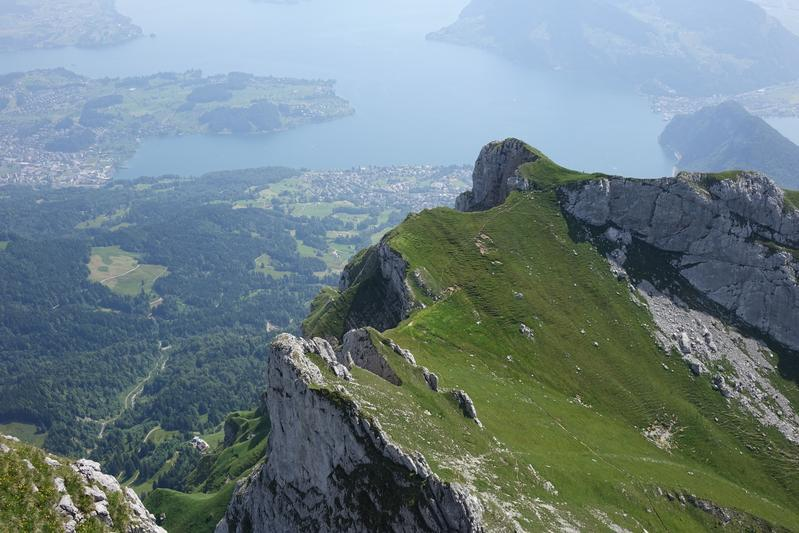

In [19]:
base_image = matplotlib.pyplot.imread("mountain.jpeg")
Image("mountain.jpeg")

Now we can replicate results of DeepDream by Google. Note that the results can vary a bit from original DeepDream because we are using TensorFlow and not Caffe.

In [11]:
image = deep_dream.render_image_deepdream(objective, sess, input_pl, base_image)

In [12]:
normalized = utils.normalize_image(image)
utils.save_image(normalized, "deepdream-mountain.jpeg")

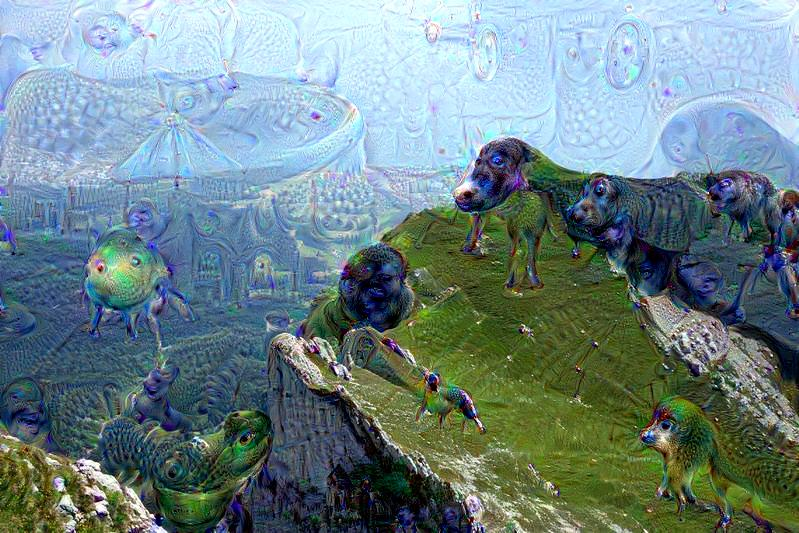

In [13]:
Image("deepdream-mountain.jpeg")

Not weird enough? Run it with more iterations...

In [14]:
image = deep_dream.render_image_deepdream(objective, sess, input_pl, base_image, iter_n=100)
normalized = utils.normalize_image(image)
utils.save_image(normalized, "psycho-mountain.jpeg")

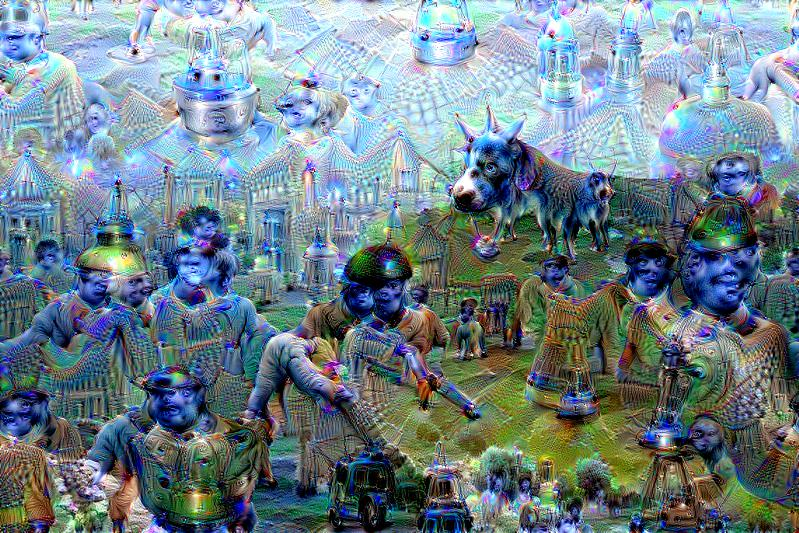

In [15]:
Image("psycho-mountain.jpeg")

Doesn't look like a zebra? Should it?

Let's select the last fully-connected layer and its 340-th component which should optimize exactly this category:

In [16]:
objective = graph.get_tensor_by_name("inception1/logits/MatMul:0")[...,340]

In [17]:
image = deep_dream.render_image_deepdream(objective, sess, input_pl, base_image, iter_n=100)
normalized = utils.normalize_image(image)
utils.save_image(normalized, "zebraish-mountain.jpeg")

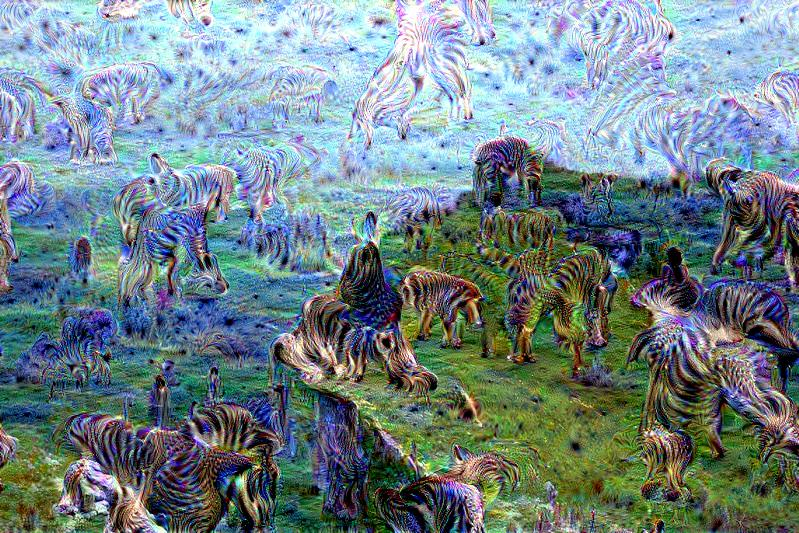

In [18]:
Image("zebraish-mountain.jpeg")